<div style="text-align:center; color:red; font-size:30px;">
Speaker recognition using MFCC and GMM
</div>

<br>

<div style="text-align:center; color:green; font-size:15px;">
By Mohamed Alaoui Mhamdi
</div>

<br>

<div style="text-align:center; font-size:15px;">
     Supervised by : kharroubi Jamal
</div>


In [1]:
from sklearn.mixture import GaussianMixture
import numpy as np
import os
import joblib 
from collections import defaultdict
import matplotlib.pyplot as plt

Function 'getclient_Names' takes two arguments: directory_path, which is the path to a directory containing folders, and start_folder, which is a string indicating the prefix of the folders you want to filter by. The function returns a list of folders (client names) within the specified directory that start with the start_folder string.

In [2]:
def getclient_Names(directory_path,start_folder='engA'):
    folders = [d for d in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, d))]
    Client_folders = [d for d in folders if d.startswith(start_folder)]
    return Client_folders


This function train_gmm_client trains a Gaussian Mixture Model (GMM) for each client in a given list of client names (clients_names). It takes three arguments: n_components, a list of integers specifying the number of components in the GMM to train; client_folder, the path to the directory containing client folders; and clients_names, a list of client names (subfolder names in client_folder).

In [3]:
def train_gmm_client(n_components,client_folder,clients_names):
    for n in n_components:
        for i in clients_names:
            # Path to the folder containing MFCC files
            folder_path = os.path.join(client_folder, f'{i}')
            files = os.listdir(folder_path)
            # Initialize an empty array to store all MFCC data
            all_mfcc_data = []

            # Iterate over each file
            for file_name in files:
                # Read the MFCC data from the file
                with open(os.path.join(folder_path, file_name), 'r') as file:
                    mfcc_data = np.loadtxt(file)
                    # Append the MFCC data to the list
                    all_mfcc_data.append(mfcc_data)

            # Concatenate all MFCC data into a single array
            all_mfcc_data = np.concatenate(all_mfcc_data)

            # Determine the number of features
            num_features = all_mfcc_data.shape[1]

            gmm = GaussianMixture(n_components=n, covariance_type='full', tol=1e-3, reg_covar=1e-6, max_iter=100, n_init=10, init_params='kmeans', random_state=0)

            gmm.fit(all_mfcc_data)
            model_file_path = f'gmm_{i}_{n}.pkl'

            joblib.dump(gmm, model_file_path)
            print(f"Model for {i} with n_components={n} saved successfully.")
            

This Python function client_test takes two arguments: folder_path, the path to a folder containing files, and clients, a list of client names. The function returns a dictionary where each key is a client name and the value is a list of file paths in the folder_path that start with the client name.

In [4]:
def client_test(folder_path,clients): 
    # Initialize a dictionary to store the directories for each client
    client_files = {client: [] for client in clients}

    # List all files in the folder
    files = os.listdir(folder_path)

    # Store directories for each client
    for file in files:
        for client in clients:
            if file.startswith(client):
                client_files[client].append(os.path.join(folder_path, file))

    return client_files

-client_indet_accr calculates the accuracy of Gaussian Mixture Models (GMMs) trained for each client (clients) on a test set of MFCC data (client_files_test). It takes four arguments: clients, a list of client names; path_for_models, the path to the directory containing the trained GMM models; client_files_test, a dictionary where each key is a client name and the value is a list of file paths containing test MFCC data for that client; and n_comp, the number of components in the GMMs (default value is 16).

In [5]:
def client_indet_accr(clients,path_for_models,client_files_test,n_comp=16):
    models= {}
    for i in clients:
        model_file_path = os.path.join(path_for_models, f'gmm_{i}_{n_comp}.pkl')
        # Load the model from the file
        loaded_model = joblib.load(model_file_path)
        models[i] = loaded_model
        
    for i in clients:

        # List all files in the test folder
        test_files = client_files_test[i]

        num_correct = 0

        for file_name in test_files:
            # Read the MFCC data from the file
            with open((file_name), 'r') as file:
                test_mfcc_data = np.loadtxt(file)

            max_score = float('-inf')
            best_model = None

            for cl, model in models.items():
                score = model.score(test_mfcc_data)
                if score > max_score:
                    max_score = score
                    best_model = cl

            if best_model == i :
                    num_correct += 1

        accuracy = num_correct /len(client_files_test[i])

        print(f"Accuracy of the {i} model on the test set: {accuracy}")


# Identification

## English Clients

In [6]:
# Path to the directory containing the eng folders clients 
directory_path = rf'C:\Users\Pro\Desktop\Clients\eng_clients'
english_client_names =getclient_Names(directory_path)
english_client_names

['engA_F_4', 'engA_F_7', 'engA_F_9', 'engA_H_12', 'engA_H_5', 'engA_H_9']

In [84]:
n_components=[16,64,128]
client_folder = rf'C:\Users\Pro\Desktop\Clients\eng_clients'
train_gmm_client(n_components,client_folder,english_client_names)

Model for engA_F_4 with n_components=16 saved successfully.
Model for engA_F_7 with n_components=16 saved successfully.
Model for engA_F_9 with n_components=16 saved successfully.
Model for engA_H_12 with n_components=16 saved successfully.
Model for engA_H_5 with n_components=16 saved successfully.
Model for engA_H_9 with n_components=16 saved successfully.
Model for engA_F_4 with n_components=64 saved successfully.
Model for engA_F_7 with n_components=64 saved successfully.
Model for engA_F_9 with n_components=64 saved successfully.
Model for engA_H_12 with n_components=64 saved successfully.
Model for engA_H_5 with n_components=64 saved successfully.
Model for engA_H_9 with n_components=64 saved successfully.
Model for engA_F_4 with n_components=128 saved successfully.
Model for engA_F_7 with n_components=128 saved successfully.
Model for engA_F_9 with n_components=128 saved successfully.
Model for engA_H_12 with n_components=128 saved successfully.
Model for engA_H_5 with n_compone

In [7]:
folder_path = rf'C:\Users\Pro\Desktop\Clients\eng_clients\test'
eng_client_test=client_test(folder_path,english_client_names)
eng_client_test['engA_F_4'][0:5]

['C:\\Users\\Pro\\Desktop\\Clients\\eng_clients\\test\\engA_F_4_10_mfcc.txt',
 'C:\\Users\\Pro\\Desktop\\Clients\\eng_clients\\test\\engA_F_4_11_mfcc.txt',
 'C:\\Users\\Pro\\Desktop\\Clients\\eng_clients\\test\\engA_F_4_12_mfcc.txt',
 'C:\\Users\\Pro\\Desktop\\Clients\\eng_clients\\test\\engA_F_4_13_mfcc.txt',
 'C:\\Users\\Pro\\Desktop\\Clients\\eng_clients\\test\\engA_F_4_15_mfcc.txt']

In [87]:
path_for_models= 'C:\\Users\\Pro\\Desktop\\Clients\\eng_clients\\'
client_indet_accr(english_client_names,path_for_models,eng_client_test,n_comp=16)

Accuracy of the engA_F_4 model on the test set: 0.9354838709677419
Accuracy of the engA_F_7 model on the test set: 1.0
Accuracy of the engA_F_9 model on the test set: 1.0
Accuracy of the engA_H_12 model on the test set: 1.0
Accuracy of the engA_H_5 model on the test set: 1.0
Accuracy of the engA_H_9 model on the test set: 1.0


In [89]:
client_indet_accr(english_client_names,path_for_models,eng_client_test,n_comp=64)

Accuracy of the engA_F_4 model on the test set: 0.9516129032258065
Accuracy of the engA_F_7 model on the test set: 1.0
Accuracy of the engA_F_9 model on the test set: 1.0
Accuracy of the engA_H_12 model on the test set: 1.0
Accuracy of the engA_H_5 model on the test set: 1.0
Accuracy of the engA_H_9 model on the test set: 1.0


In [90]:
client_indet_accr(english_client_names,path_for_models,eng_client_test,n_comp=128)

Accuracy of the engA_F_4 model on the test set: 0.8225806451612904
Accuracy of the engA_F_7 model on the test set: 0.9651162790697675
Accuracy of the engA_F_9 model on the test set: 1.0
Accuracy of the engA_H_12 model on the test set: 1.0
Accuracy of the engA_H_5 model on the test set: 1.0
Accuracy of the engA_H_9 model on the test set: 1.0


### SpanishClients

In [8]:
directory_path = rf'C:\Users\Pro\Desktop\Clients\spanish_clients'
spanish_client_names =getclient_Names(directory_path,start_folder='es')
spanish_client_names

['es_f_1', 'es_f_4', 'es_f_6', 'es_h_3', 'es_h_5', 'es_h_7']

In [94]:
n_components=[16,64,128]
client_folder = rf'C:\Users\Pro\Desktop\Clients\spanish_clients'
train_gmm_client(n_components,client_folder,spanish_client_names)

Model for es_f_1 with n_components=16 saved successfully.
Model for es_f_4 with n_components=16 saved successfully.
Model for es_f_6 with n_components=16 saved successfully.
Model for es_h_3 with n_components=16 saved successfully.
Model for es_h_5 with n_components=16 saved successfully.
Model for es_h_7 with n_components=16 saved successfully.
Model for es_f_1 with n_components=64 saved successfully.
Model for es_f_4 with n_components=64 saved successfully.
Model for es_f_6 with n_components=64 saved successfully.
Model for es_h_3 with n_components=64 saved successfully.
Model for es_h_5 with n_components=64 saved successfully.
Model for es_h_7 with n_components=64 saved successfully.
Model for es_f_1 with n_components=128 saved successfully.
Model for es_f_4 with n_components=128 saved successfully.
Model for es_f_6 with n_components=128 saved successfully.
Model for es_h_3 with n_components=128 saved successfully.
Model for es_h_5 with n_components=128 saved successfully.
Model for

In [9]:
folder_path = rf'C:\Users\Pro\Desktop\Clients\spanish_clients\test'
esp_client_test=client_test(folder_path,spanish_client_names)
esp_client_test['es_f_1'][0:5]

['C:\\Users\\Pro\\Desktop\\Clients\\spanish_clients\\test\\es_f_1 (1)_mfcc.txt',
 'C:\\Users\\Pro\\Desktop\\Clients\\spanish_clients\\test\\es_f_1 (10)_mfcc.txt',
 'C:\\Users\\Pro\\Desktop\\Clients\\spanish_clients\\test\\es_f_1 (11)_mfcc.txt',
 'C:\\Users\\Pro\\Desktop\\Clients\\spanish_clients\\test\\es_f_1 (12)_mfcc.txt',
 'C:\\Users\\Pro\\Desktop\\Clients\\spanish_clients\\test\\es_f_1 (13)_mfcc.txt']

In [97]:
path_for_models_es= 'C:\\Users\\Pro\\Desktop\\Clients\\spanish_clients\\'
client_indet_accr(spanish_client_names,path_for_models_es,esp_client_test,n_comp=16)

Accuracy of the es_f_1 model on the test set: 1.0
Accuracy of the es_f_4 model on the test set: 0.9833333333333333
Accuracy of the es_f_6 model on the test set: 1.0
Accuracy of the es_h_3 model on the test set: 0.8235294117647058
Accuracy of the es_h_5 model on the test set: 0.7777777777777778
Accuracy of the es_h_7 model on the test set: 1.0


In [98]:
client_indet_accr(spanish_client_names2,path_for_models_es,esp_client_test,n_comp=64)

Accuracy of the es_f_1 model on the test set: 0.9838709677419355
Accuracy of the es_f_4 model on the test set: 0.9833333333333333
Accuracy of the es_f_6 model on the test set: 1.0
Accuracy of the es_h_3 model on the test set: 0.8235294117647058
Accuracy of the es_h_5 model on the test set: 0.7777777777777778
Accuracy of the es_h_7 model on the test set: 1.0


In [99]:
client_indet_accr(spanish_client_names2,path_for_models_es,esp_client_test,n_comp=128)

Accuracy of the es_f_1 model on the test set: 0.9193548387096774
Accuracy of the es_f_4 model on the test set: 0.9666666666666667
Accuracy of the es_f_6 model on the test set: 0.21666666666666667
Accuracy of the es_h_3 model on the test set: 0.8235294117647058
Accuracy of the es_h_5 model on the test set: 0.7777777777777778
Accuracy of the es_h_7 model on the test set: 1.0


### japanese clients

In [10]:
directory_path = rf'C:\Users\Pro\Desktop\Clients\jap_clients'
jp_client_names = getclient_Names(directory_path,start_folder='JP')
jp_client_names

['JP_F_1', 'JP_F_10', 'JP_F_2', 'JP_F_4', 'JP_F_9', 'JP_H_11']

In [102]:
n_components=[16,64,128]
client_folder = rf'C:\Users\Pro\Desktop\Clients\jap_clients'
train_gmm_client(n_components,client_folder,jp_client_names)

Model for JP_F_1 with n_components=16 saved successfully.
Model for JP_F_10 with n_components=16 saved successfully.
Model for JP_F_2 with n_components=16 saved successfully.
Model for JP_F_4 with n_components=16 saved successfully.
Model for JP_F_9 with n_components=16 saved successfully.
Model for JP_H_11 with n_components=16 saved successfully.
Model for JP_F_1 with n_components=64 saved successfully.
Model for JP_F_10 with n_components=64 saved successfully.
Model for JP_F_2 with n_components=64 saved successfully.
Model for JP_F_4 with n_components=64 saved successfully.
Model for JP_F_9 with n_components=64 saved successfully.
Model for JP_H_11 with n_components=64 saved successfully.
Model for JP_F_1 with n_components=128 saved successfully.
Model for JP_F_10 with n_components=128 saved successfully.
Model for JP_F_2 with n_components=128 saved successfully.
Model for JP_F_4 with n_components=128 saved successfully.
Model for JP_F_9 with n_components=128 saved successfully.
Mode

In [11]:
folder_path = rf'C:\Users\Pro\Desktop\Clients\jap_clients\test'
jp_client_test=client_test(folder_path,jp_client_names)
jp_client_test['JP_F_1'][0:5]

['C:\\Users\\Pro\\Desktop\\Clients\\jap_clients\\test\\JP_F_10_10_mfcc.txt',
 'C:\\Users\\Pro\\Desktop\\Clients\\jap_clients\\test\\JP_F_10_11_mfcc.txt',
 'C:\\Users\\Pro\\Desktop\\Clients\\jap_clients\\test\\JP_F_10_12_mfcc.txt',
 'C:\\Users\\Pro\\Desktop\\Clients\\jap_clients\\test\\JP_F_10_13_mfcc.txt',
 'C:\\Users\\Pro\\Desktop\\Clients\\jap_clients\\test\\JP_F_10_14_mfcc.txt']

In [105]:
path_for_models_jp= 'C:\\Users\\Pro\\Desktop\\Clients\\jap_clients\\'
client_indet_accr(jp_client_names,path_for_models_jp,jp_client_test,n_comp=16)

Accuracy of the JP_F_1 model on the test set: 0.5
Accuracy of the JP_F_10 model on the test set: 1.0
Accuracy of the JP_F_2 model on the test set: 1.0
Accuracy of the JP_F_4 model on the test set: 1.0
Accuracy of the JP_F_9 model on the test set: 0.8387096774193549
Accuracy of the JP_H_11 model on the test set: 1.0


In [106]:
path_for_models_jp= 'C:\\Users\\Pro\\Desktop\\Clients\\jap_clients\\'
client_indet_accr(jp_client_names,path_for_models_jp,jp_client_test,n_comp=64)

Accuracy of the JP_F_1 model on the test set: 0.5
Accuracy of the JP_F_10 model on the test set: 1.0
Accuracy of the JP_F_2 model on the test set: 1.0
Accuracy of the JP_F_4 model on the test set: 1.0
Accuracy of the JP_F_9 model on the test set: 0.8387096774193549
Accuracy of the JP_H_11 model on the test set: 1.0


In [107]:
path_for_models_jp= 'C:\\Users\\Pro\\Desktop\\Clients\\jap_clients\\'
client_indet_accr(jp_client_names,path_for_models_jp,jp_client_test,n_comp=128)

Accuracy of the JP_F_1 model on the test set: 0.0
Accuracy of the JP_F_10 model on the test set: 0.9767441860465116
Accuracy of the JP_F_2 model on the test set: 1.0
Accuracy of the JP_F_4 model on the test set: 1.0
Accuracy of the JP_F_9 model on the test set: 0.7741935483870968
Accuracy of the JP_H_11 model on the test set: 0.0


### Arabic Clients

In [12]:
directory_path = rf'C:\Users\Pro\Desktop\Clients\arabic_clients'
ar_client_names = getclient_Names(directory_path,start_folder='Ar')
ar_client_names

['Ar_F1', 'Ar_F10', 'Ar_F12', 'Ar_F15', 'Ar_F16']

In [109]:
n_components=[16,64,128]
client_folder = rf'C:\Users\Pro\Desktop\Clients\arabic_clients'
train_gmm_client(n_components,client_folder,ar_client_names)

Model for Ar_F1 with n_components=16 saved successfully.
Model for Ar_F10 with n_components=16 saved successfully.
Model for Ar_F12 with n_components=16 saved successfully.
Model for Ar_F15 with n_components=16 saved successfully.
Model for Ar_F16 with n_components=16 saved successfully.
Model for Ar_F1 with n_components=64 saved successfully.
Model for Ar_F10 with n_components=64 saved successfully.
Model for Ar_F12 with n_components=64 saved successfully.
Model for Ar_F15 with n_components=64 saved successfully.
Model for Ar_F16 with n_components=64 saved successfully.
Model for Ar_F1 with n_components=128 saved successfully.
Model for Ar_F10 with n_components=128 saved successfully.
Model for Ar_F12 with n_components=128 saved successfully.
Model for Ar_F15 with n_components=128 saved successfully.
Model for Ar_F16 with n_components=128 saved successfully.


In [13]:
folder_path = rf'C:\Users\Pro\Desktop\Clients\arabic_clients\test'
ar_client_test=client_test(folder_path,ar_client_names)
ar_client_test['Ar_F1'][0:5]

['C:\\Users\\Pro\\Desktop\\Clients\\arabic_clients\\test\\Ar_F10_10_mfcc.txt',
 'C:\\Users\\Pro\\Desktop\\Clients\\arabic_clients\\test\\Ar_F10_11_mfcc.txt',
 'C:\\Users\\Pro\\Desktop\\Clients\\arabic_clients\\test\\Ar_F10_12_mfcc.txt',
 'C:\\Users\\Pro\\Desktop\\Clients\\arabic_clients\\test\\Ar_F10_13_mfcc.txt',
 'C:\\Users\\Pro\\Desktop\\Clients\\arabic_clients\\test\\Ar_F10_14_mfcc.txt']

In [124]:
path_for_models= 'C:\\Users\\Pro\\Desktop\\Clients\\arabic_clients\\'
client_indet_accr(ar_client_names,path_for_models,ar_client_test,n_comp=16)

Accuracy of the Ar_F1 model on the test set: 0.5030674846625767
Accuracy of the Ar_F10 model on the test set: 1.0
Accuracy of the Ar_F12 model on the test set: 1.0
Accuracy of the Ar_F15 model on the test set: 1.0
Accuracy of the Ar_F16 model on the test set: 0.9821428571428571


In [125]:
path_for_models= 'C:\\Users\\Pro\\Desktop\\Clients\\arabic_clients\\'
client_indet_accr(ar_client_names,path_for_models,ar_client_test,n_comp=64)

Accuracy of the Ar_F1 model on the test set: 0.48466257668711654
Accuracy of the Ar_F10 model on the test set: 1.0
Accuracy of the Ar_F12 model on the test set: 1.0
Accuracy of the Ar_F15 model on the test set: 1.0
Accuracy of the Ar_F16 model on the test set: 0.9821428571428571


In [126]:
path_for_models= 'C:\\Users\\Pro\\Desktop\\Clients\\arabic_clients\\'
client_indet_accr(ar_client_names,path_for_models,ar_client_test,n_comp=128)

Accuracy of the Ar_F1 model on the test set: 0.5
Accuracy of the Ar_F10 model on the test set: 1.0
Accuracy of the Ar_F12 model on the test set: 1.0
Accuracy of the Ar_F15 model on the test set: 1.0
Accuracy of the Ar_F16 model on the test set: 0.9821428571428571


# Verification

This function scores calculates the scores of test MFCC data files using a trained Gaussian Mixture Model (GMM) for a specific client (i). It takes five arguments: i, the client name; path_for_models, the path to the directory containing the trained GMM models; test_folder_path, the path to the folder containing the test MFCC data files; n_comp, the number of components in the GMMs (default value is 16).

In [14]:
def scores(i, path_for_models, test_folder_path, n_comp=16):
    scores = {}
    model_file_path = os.path.join(path_for_models, f'gmm_{i}_{n_comp}.pkl')
    model = joblib.load(model_file_path)
    test_files = os.listdir(test_folder_path)

    for file_name in test_files:

        # Read the MFCC data from the file
        with open(os.path.join(test_folder_path, file_name), 'r') as file:
            test_mfcc_data = np.loadtxt(file)

        score = model.score(test_mfcc_data)
        scores[file_name] = score
    return scores

In [201]:
path_for_models = 'C:\\Users\\Pro\\Desktop\\Clients\\models'
folder_path = rf'C:\Users\Pro\Desktop\Clients\Test'
scores('engA_F_4',path_for_models,folder_path)

{'Ar_F10_10_mfcc.txt': -68.3661448128679,
 'Ar_F10_11_mfcc.txt': -68.3494708864517,
 'Ar_F10_12_mfcc.txt': -70.21295334404759,
 'Ar_F10_13_mfcc.txt': -67.2073221245039,
 'Ar_F10_14_mfcc.txt': -67.75178144300874,
 'Ar_F10_15_mfcc.txt': -68.69300431888668,
 'Ar_F10_16_mfcc.txt': -69.28682946749007,
 'Ar_F10_17_mfcc.txt': -68.35283425395636,
 'Ar_F10_18_mfcc.txt': -68.68867667682841,
 'Ar_F10_19_mfcc.txt': -67.67287650787851,
 'Ar_F10_1_mfcc.txt': -67.4543009119379,
 'Ar_F10_20_mfcc.txt': -67.49465644327286,
 'Ar_F10_21_mfcc.txt': -66.92437242217756,
 'Ar_F10_22_mfcc.txt': -68.35869278316754,
 'Ar_F10_23_mfcc.txt': -69.24059598504273,
 'Ar_F10_24_mfcc.txt': -66.35724172331702,
 'Ar_F10_25_mfcc.txt': -68.13477448306864,
 'Ar_F10_26_mfcc.txt': -68.19838183789268,
 'Ar_F10_2_mfcc.txt': -67.77739536029235,
 'Ar_F10_3_mfcc.txt': -68.80026949228476,
 'Ar_F10_4_mfcc.txt': -67.8775275721205,
 'Ar_F10_5_mfcc.txt': -69.45059275511368,
 'Ar_F10_6_mfcc.txt': -70.42260105132291,
 'Ar_F10_7_mfcc.txt': 

In [29]:
import matplotlib.pyplot as plt
from collections import defaultdict

def plot(client_name, scores_dict, step_size=0.01, det=1, ax=None):
   # Find the minimum and maximum scores
    min_score = min(scores_dict.values())
    max_score = max(scores_dict.values())

    # Create a list of thresholds from min to max with a step size
    step_size = 0.01  
    thresholds = [min_score + i * step_size for i in range(int((max_score - min_score) / step_size))]

    # True Positive, True Negative, False Positive, False Negative
    tp = defaultdict(int)
    tn = defaultdict(int)
    fp = defaultdict(int)
    fn = defaultdict(int)

    # Calculate True Positive, True Negative, False Positive, False Negative for each threshold
    for threshold in thresholds:
        for file_name, score in scores_dict.items():
            if compare_file_names(client_name,file_name):
                if score > threshold:
                    tp[threshold] += 1
                else:
                    fn[threshold] += 1
            else:
                if score <= threshold:
                    tn[threshold] += 1
                else:
                    fp[threshold] += 1

    # Calculate False Positive Rate and False Negative Rate for each threshold
    fpr = {threshold: fp[threshold] / (fp[threshold] + tn[threshold]) for threshold in thresholds}
    fnr = {threshold: fn[threshold] / (fn[threshold] + tp[threshold]) for threshold in thresholds}
    # Calculate True Positive Rate (TPR) and True Negative Rate (TNR) for each threshold
    tpr = {threshold: tp[threshold] / (tp[threshold] + fn[threshold]) for threshold in thresholds}
    tnr = {threshold: tn[threshold] / (tn[threshold] + fp[threshold]) for threshold in thresholds}
    if det == 1:
        # Plot DET curve
        ax.plot(fpr.values(), fnr.values(), label=client_name)
        ax.set_xlabel('False Positive Rate (FPR)')
        ax.set_ylabel('False Negative Rate (FNR)')
        ax.set_title(f'DET1 Curve for {client_name}')
        ax.legend()
    elif det == 2:
        # Plot TPR and TNR curves
        ax.plot(thresholds, list(fpr.values()), label='FPR')
        ax.plot(thresholds, list(fnr.values()), label='FNR')
        ax.set_xlabel('Threshold')
        ax.set_ylabel('Rate')
        ax.set_title(f'DET2 Curve for {client_name}')
        ax.legend()
        


In [30]:
def sub_plot(client_names,path_for_models,folder_path, n_comp=16,step_size=0.01, det=1):
    num_clients = len(client_names)

    # Calculate number of rows and columns for subplot grid
    num_rows = 2
    num_cols = 3

    # Create a figure and subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))

    # Flatten the axs array to iterate over all subplots
    axs = axs.flatten()

    # Plot each client's curve in a separate subplot
    for i, client_name in enumerate(client_names):
        scores_dictt=scores(client_name, path_for_models, folder_path, n_comp=16)
        plot(client_name, scores_dictt, step_size, det, ax=axs[i])

    # Hide unused subplots
    for j in range(num_clients, num_rows * num_cols):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()

In [31]:
def compare_file_names(client_name, file_name):
    parts = file_name.split('_')
    if len(parts) >= 4:
        parts = parts[:3]  
    return all(part1 == part2 for part1, part2 in zip(parts, client_name.split('_'))) 


In [32]:
print(english_client_names)
print(ar_client_names)
print(jp_client_names)
print(spanish_client_names)

['engA_F_4', 'engA_F_7', 'engA_F_9', 'engA_H_12', 'engA_H_5', 'engA_H_9']
['Ar_F1', 'Ar_F10', 'Ar_F12', 'Ar_F15', 'Ar_F16']
['JP_F_1', 'JP_F_10', 'JP_F_2', 'JP_F_4', 'JP_F_9', 'JP_H_11']
['es_f_1', 'es_f_4', 'es_f_6', 'es_h_3', 'es_h_5', 'es_h_7']


## n_comp=16

n_comp=16
english_client

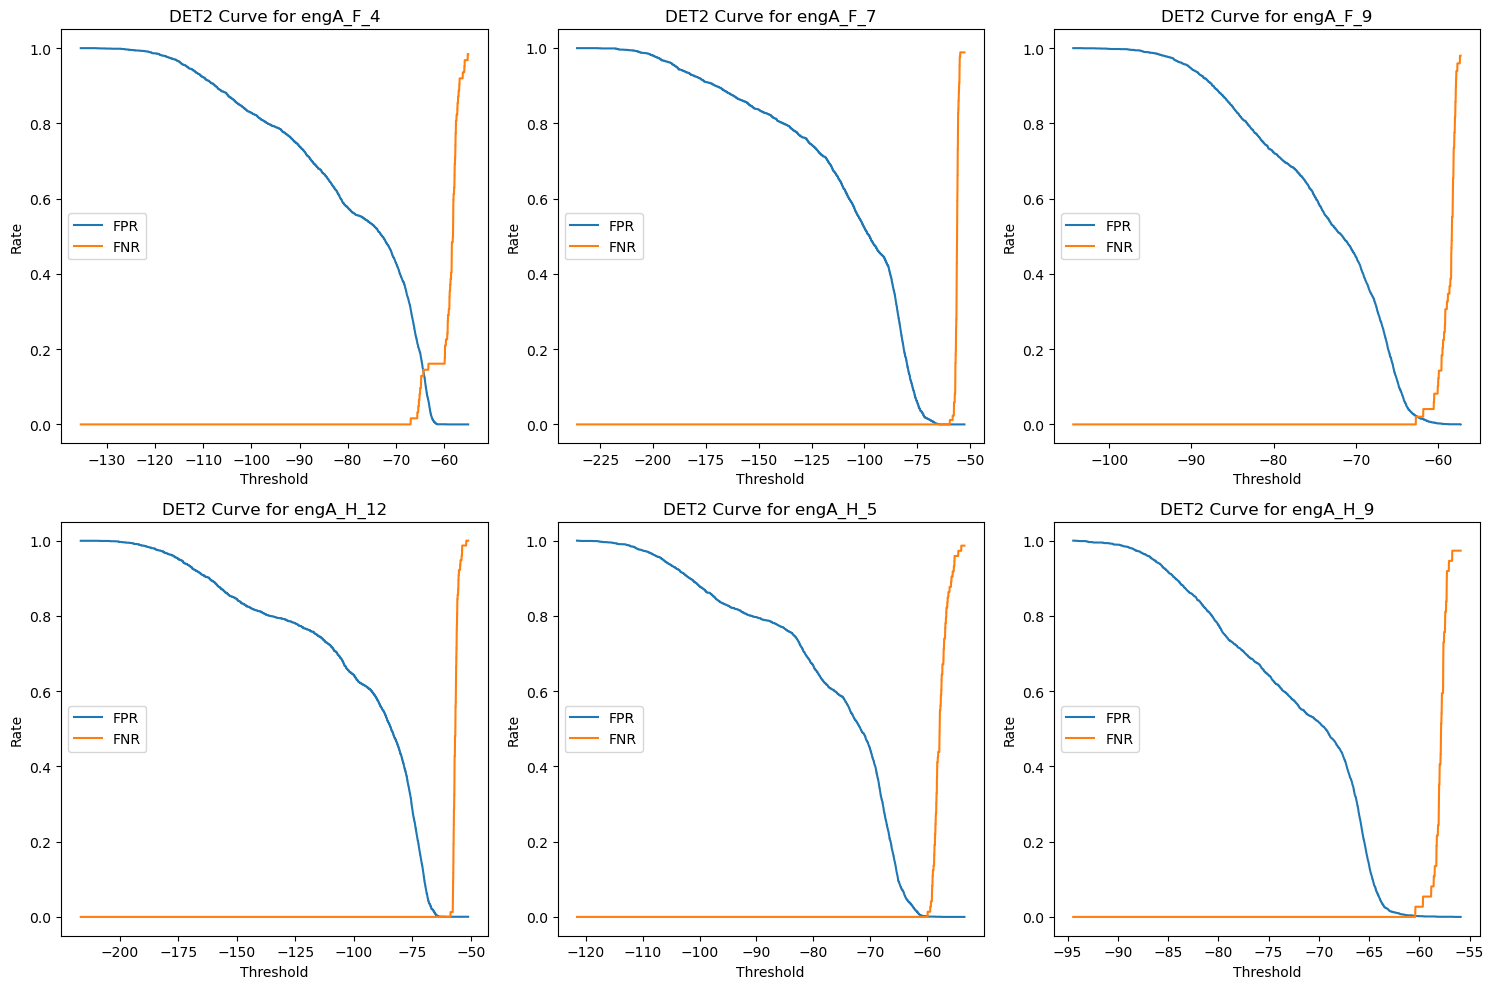

In [33]:
path_for_models = 'C:\\Users\\Pro\\Desktop\\Clients\\models'
folder_path = rf'C:\Users\Pro\Desktop\Clients\Test'
sub_plot(english_client_names,path_for_models,folder_path, n_comp=16,step_size=0.01, det=2)

n_comp=16,ar_client

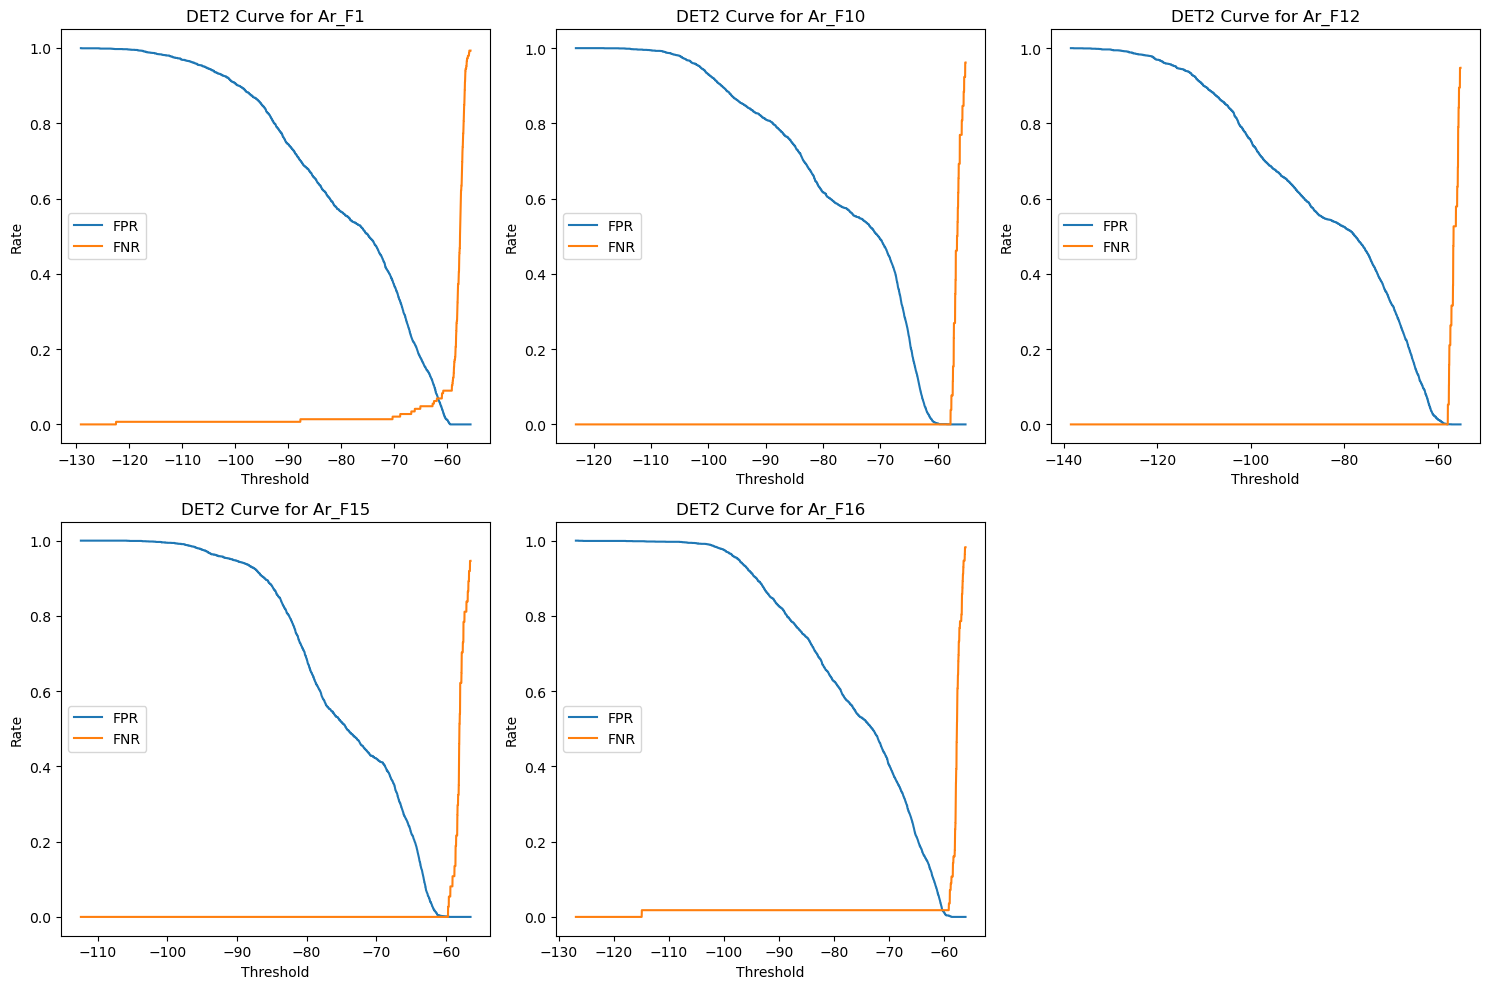

In [34]:
path_for_models = 'C:\\Users\\Pro\\Desktop\\Clients\\models'
folder_path = rf'C:\Users\Pro\Desktop\Clients\Test'
sub_plot(ar_client_names,path_for_models,folder_path, n_comp=16,step_size=0.01, det=2)

n_comp=16,jp_client

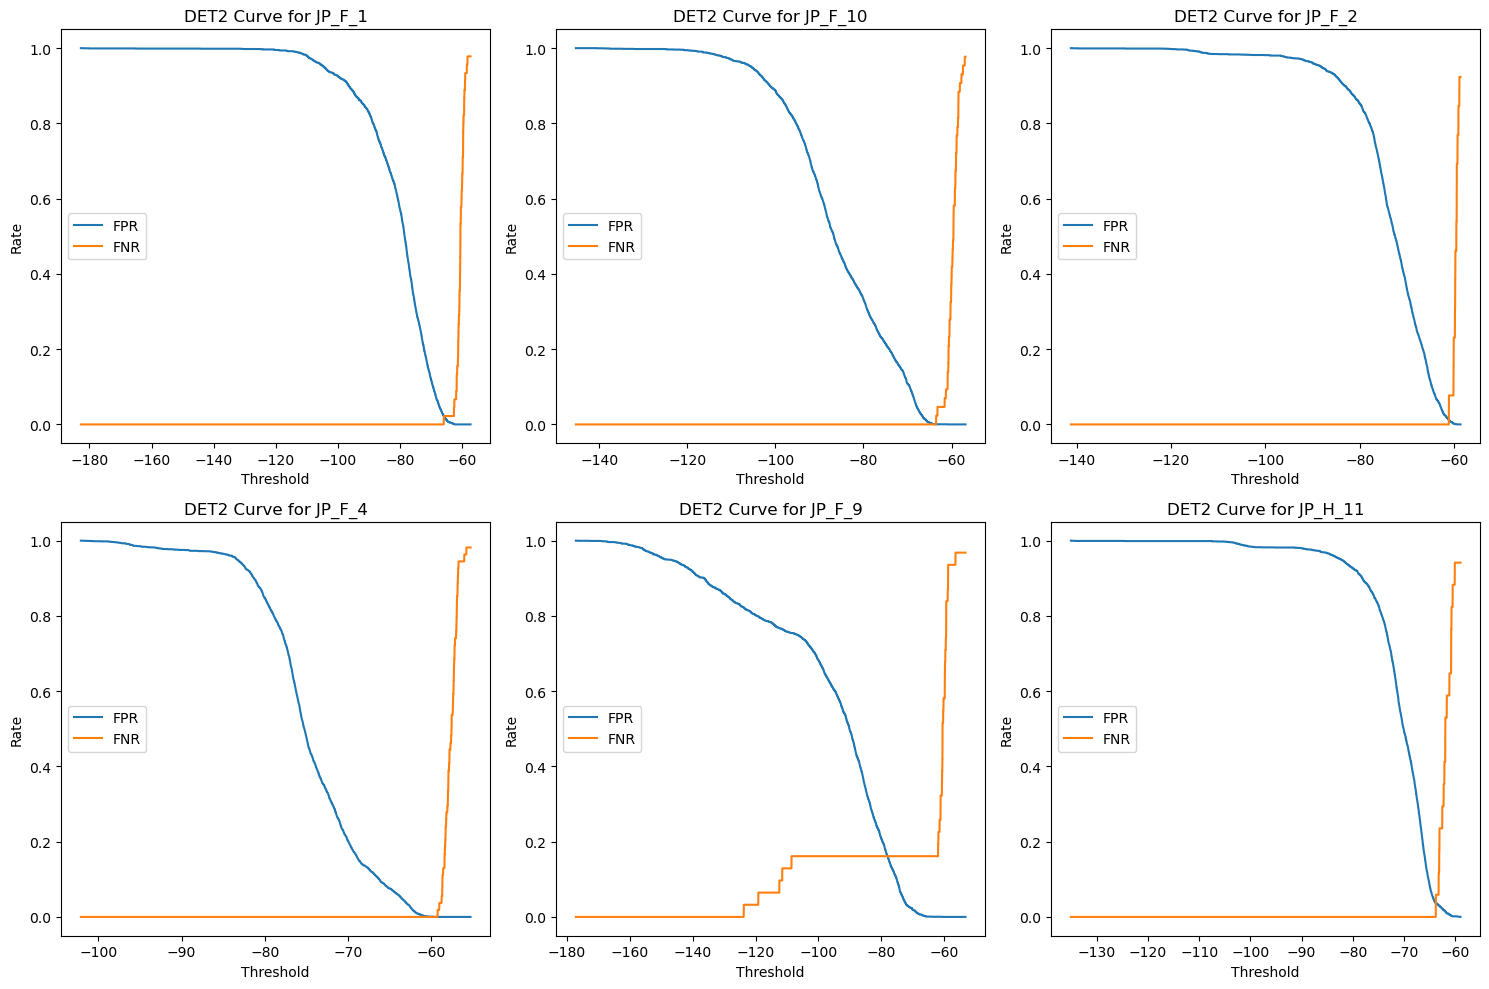

In [35]:
path_for_models = 'C:\\Users\\Pro\\Desktop\\Clients\\models'
folder_path = rf'C:\Users\Pro\Desktop\Clients\Test'
sub_plot(jp_client_names,path_for_models,folder_path, n_comp=16,step_size=0.01, det=2)

n_comp=16,spanish_client

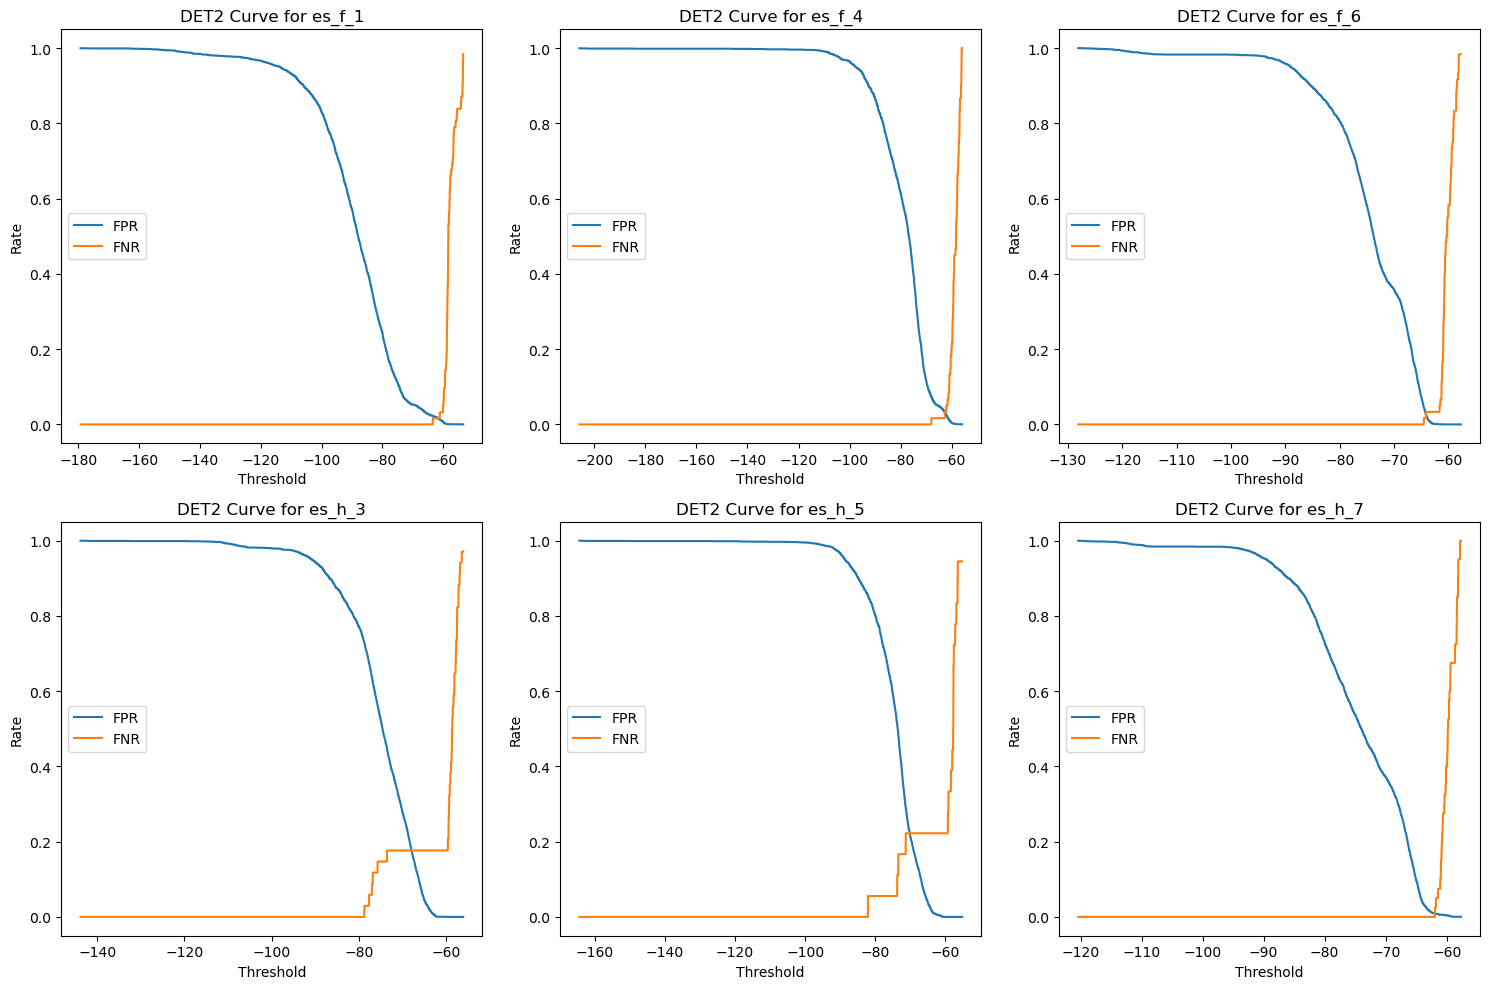

In [37]:
path_for_models = 'C:\\Users\\Pro\\Desktop\\Clients\\models'
folder_path = rf'C:\Users\Pro\Desktop\Clients\Test'
sub_plot(spanish_client_names,path_for_models,folder_path, n_comp=16,step_size=0.01, det=2)

## n_comp=64

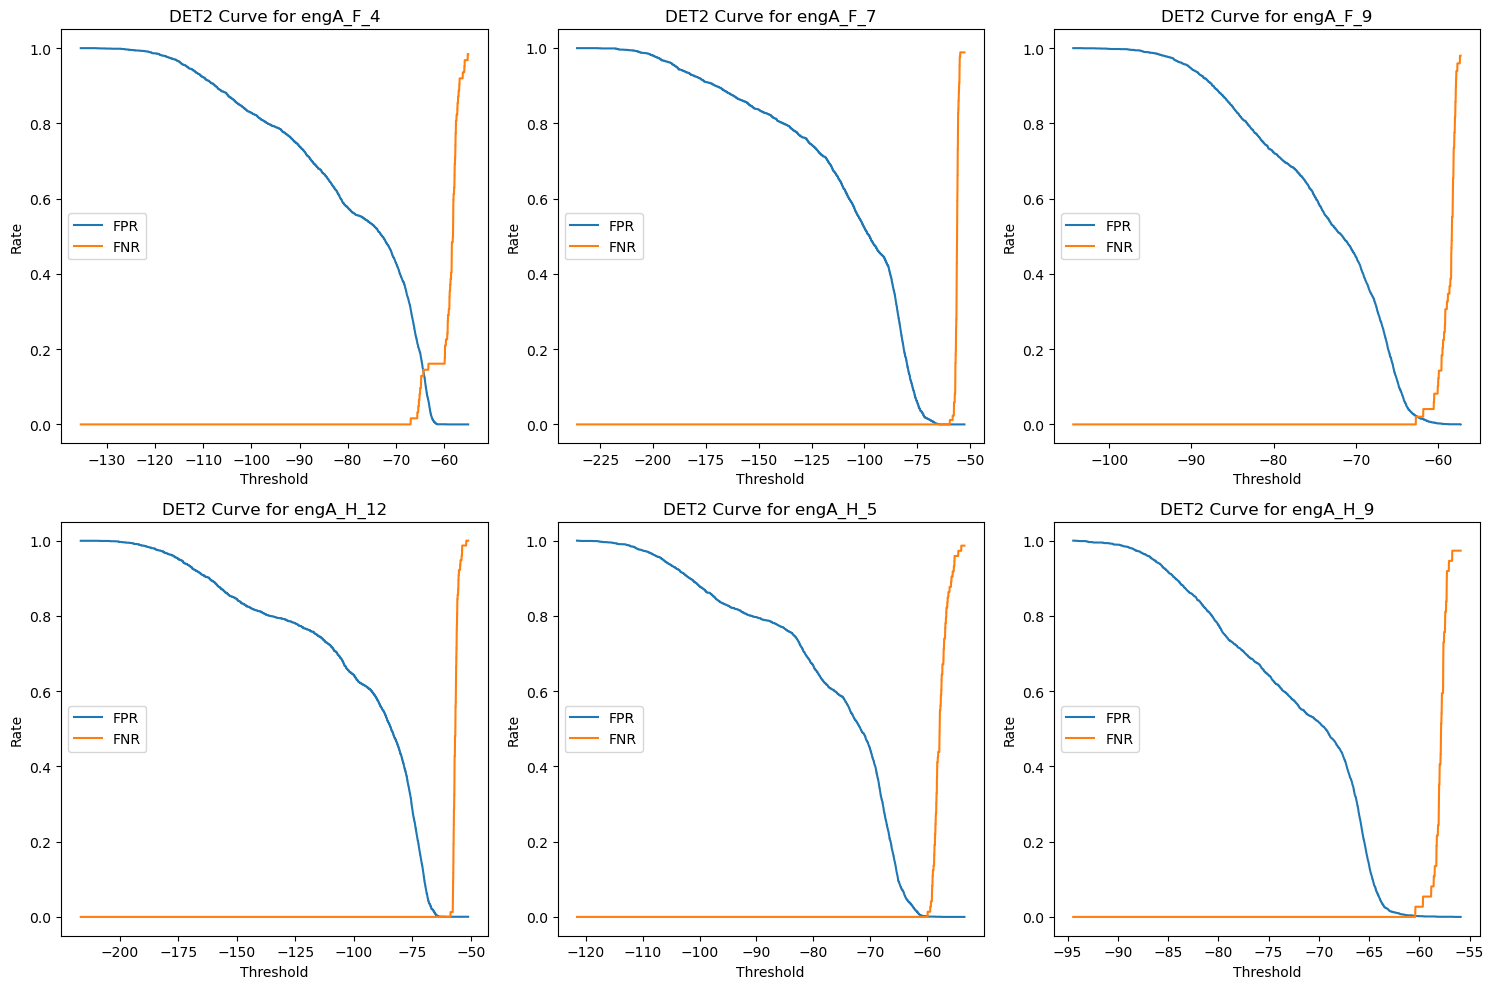

In [38]:
path_for_models = 'C:\\Users\\Pro\\Desktop\\Clients\\models'
folder_path = rf'C:\Users\Pro\Desktop\Clients\Test'
sub_plot(english_client_names,path_for_models,folder_path, n_comp=64,step_size=0.01, det=2)

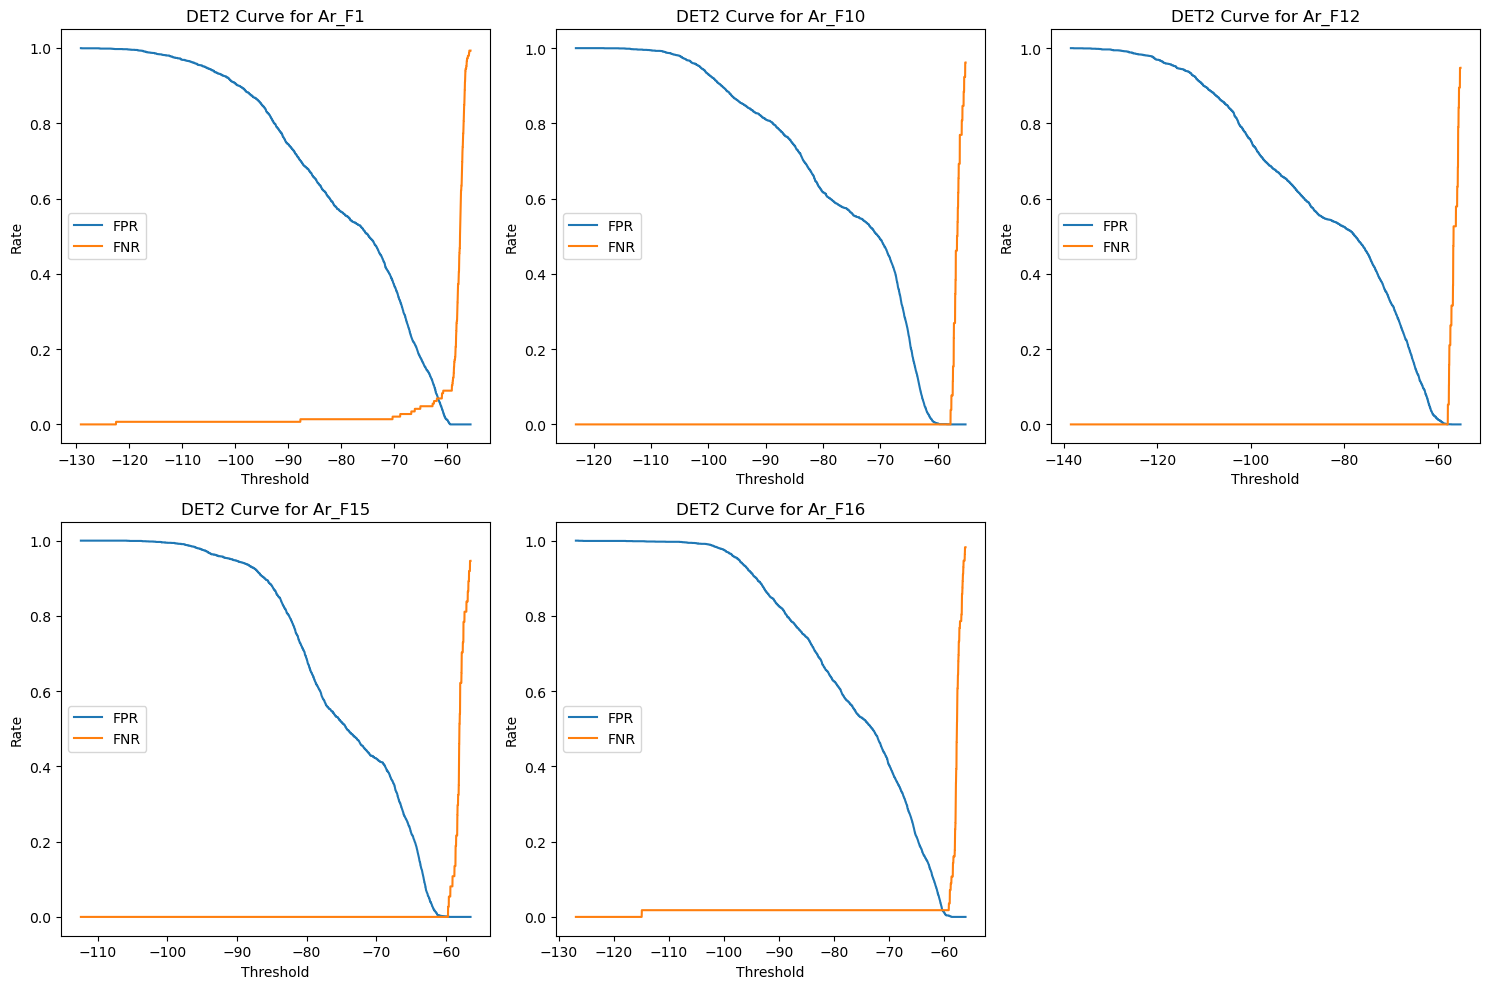

In [39]:
path_for_models = 'C:\\Users\\Pro\\Desktop\\Clients\\models'
folder_path = rf'C:\Users\Pro\Desktop\Clients\Test'
sub_plot(ar_client_names,path_for_models,folder_path, n_comp=64,step_size=0.01, det=2)

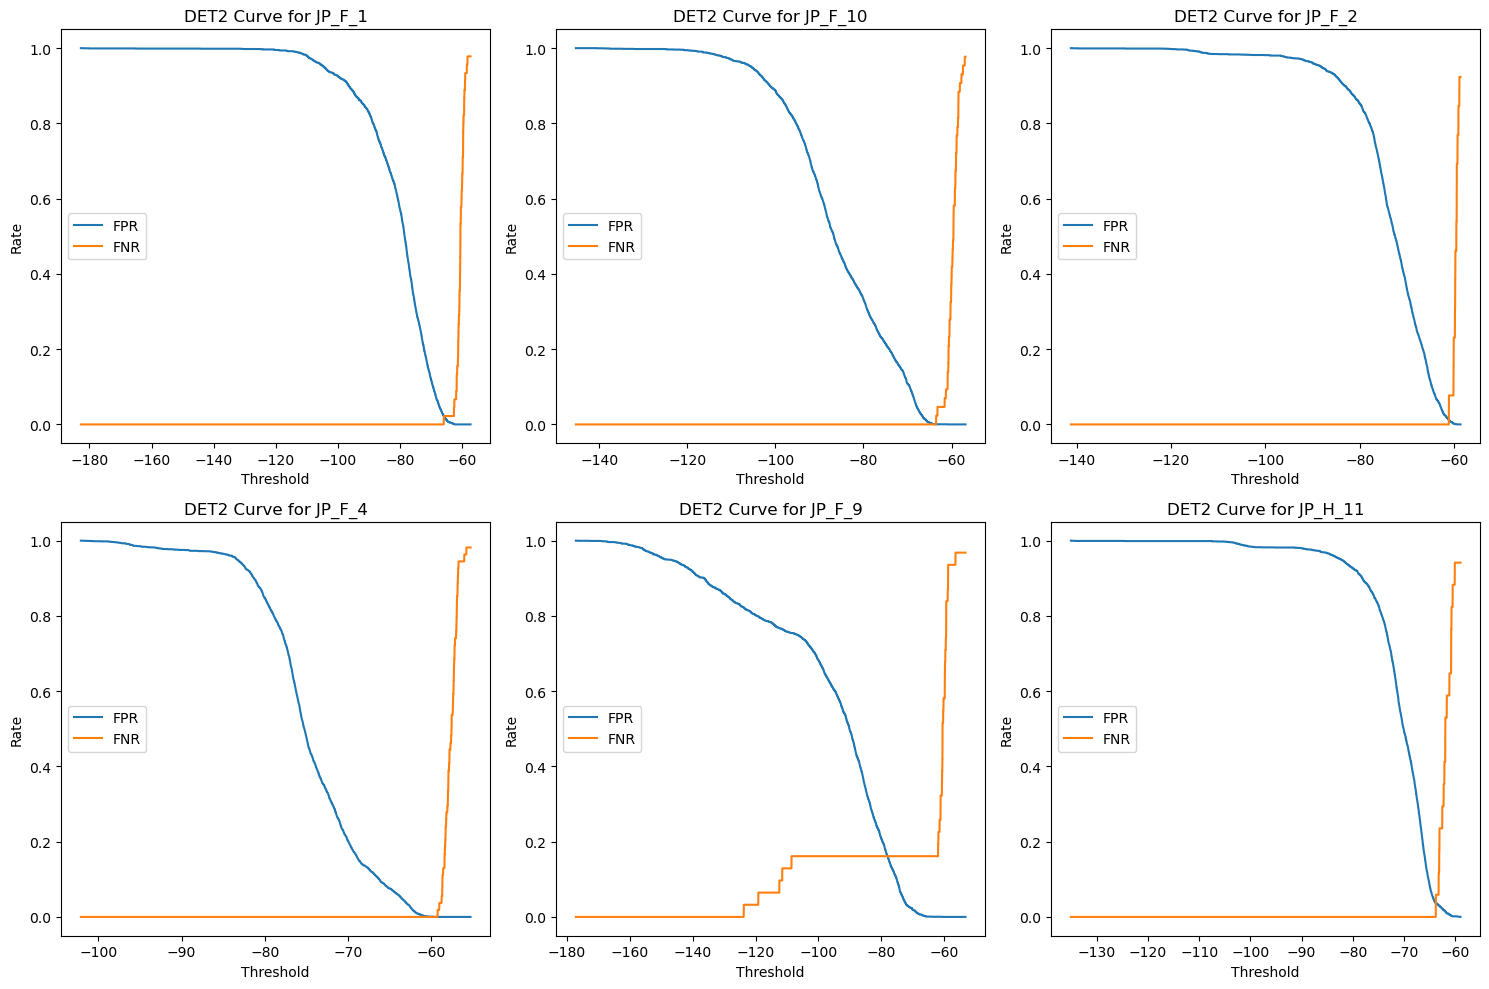

In [40]:
path_for_models = 'C:\\Users\\Pro\\Desktop\\Clients\\models'
folder_path = rf'C:\Users\Pro\Desktop\Clients\Test'
sub_plot(jp_client_names,path_for_models,folder_path, n_comp=64,step_size=0.01, det=2)

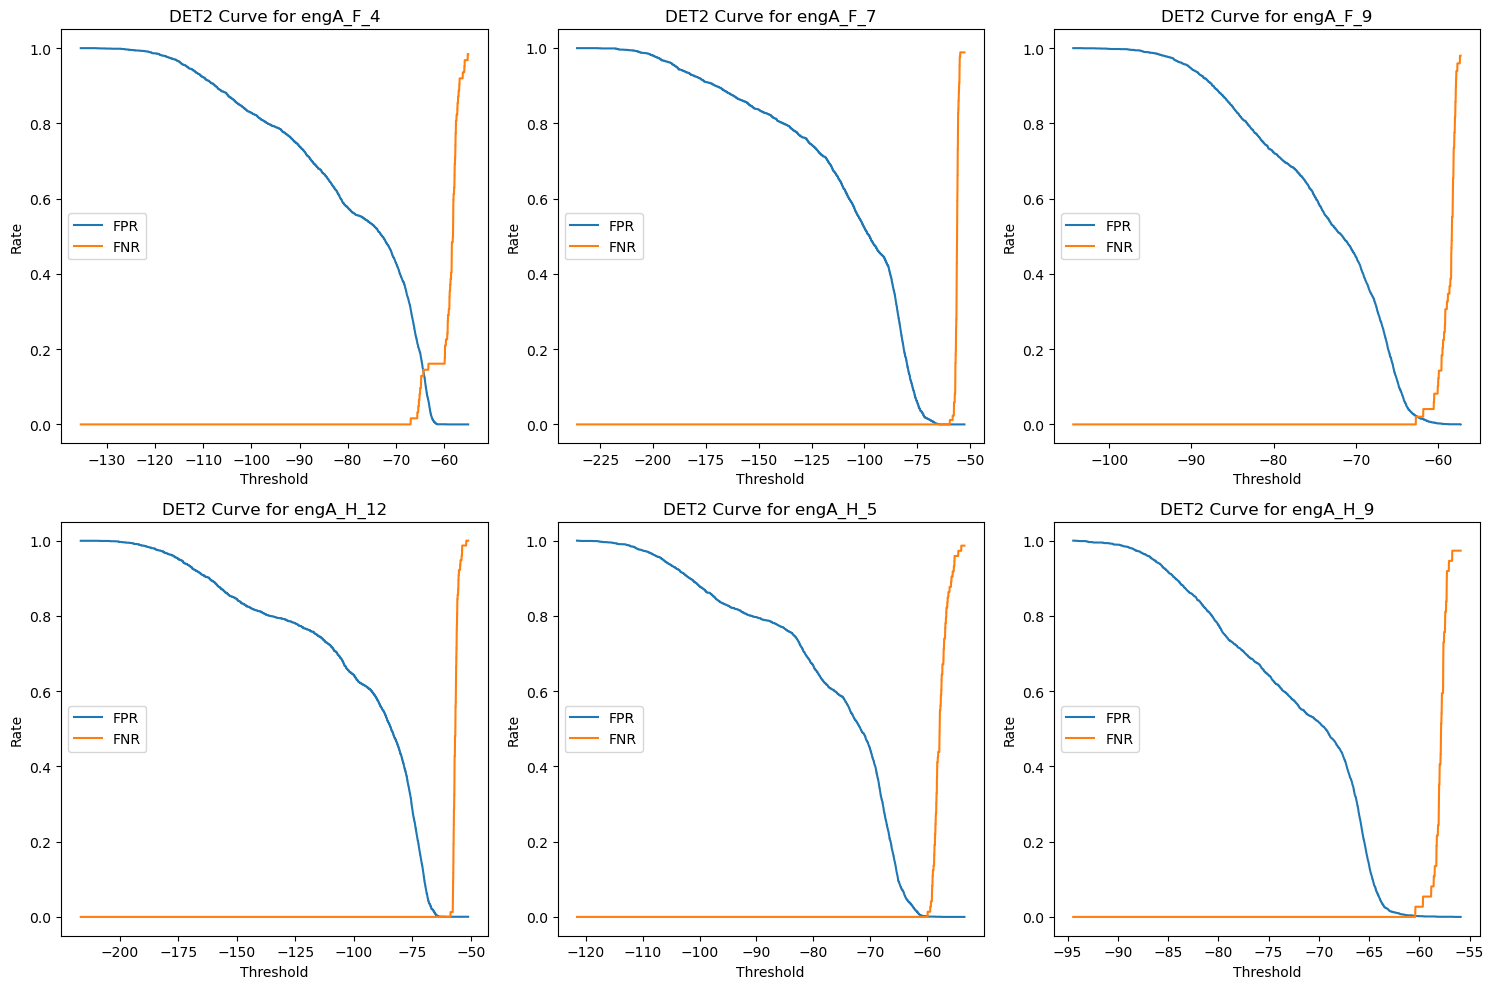

In [41]:
path_for_models = 'C:\\Users\\Pro\\Desktop\\Clients\\models'
folder_path = rf'C:\Users\Pro\Desktop\Clients\Test'
sub_plot(english_client_names,path_for_models,folder_path, n_comp=64,step_size=0.01, det=2)

## n_comp=128

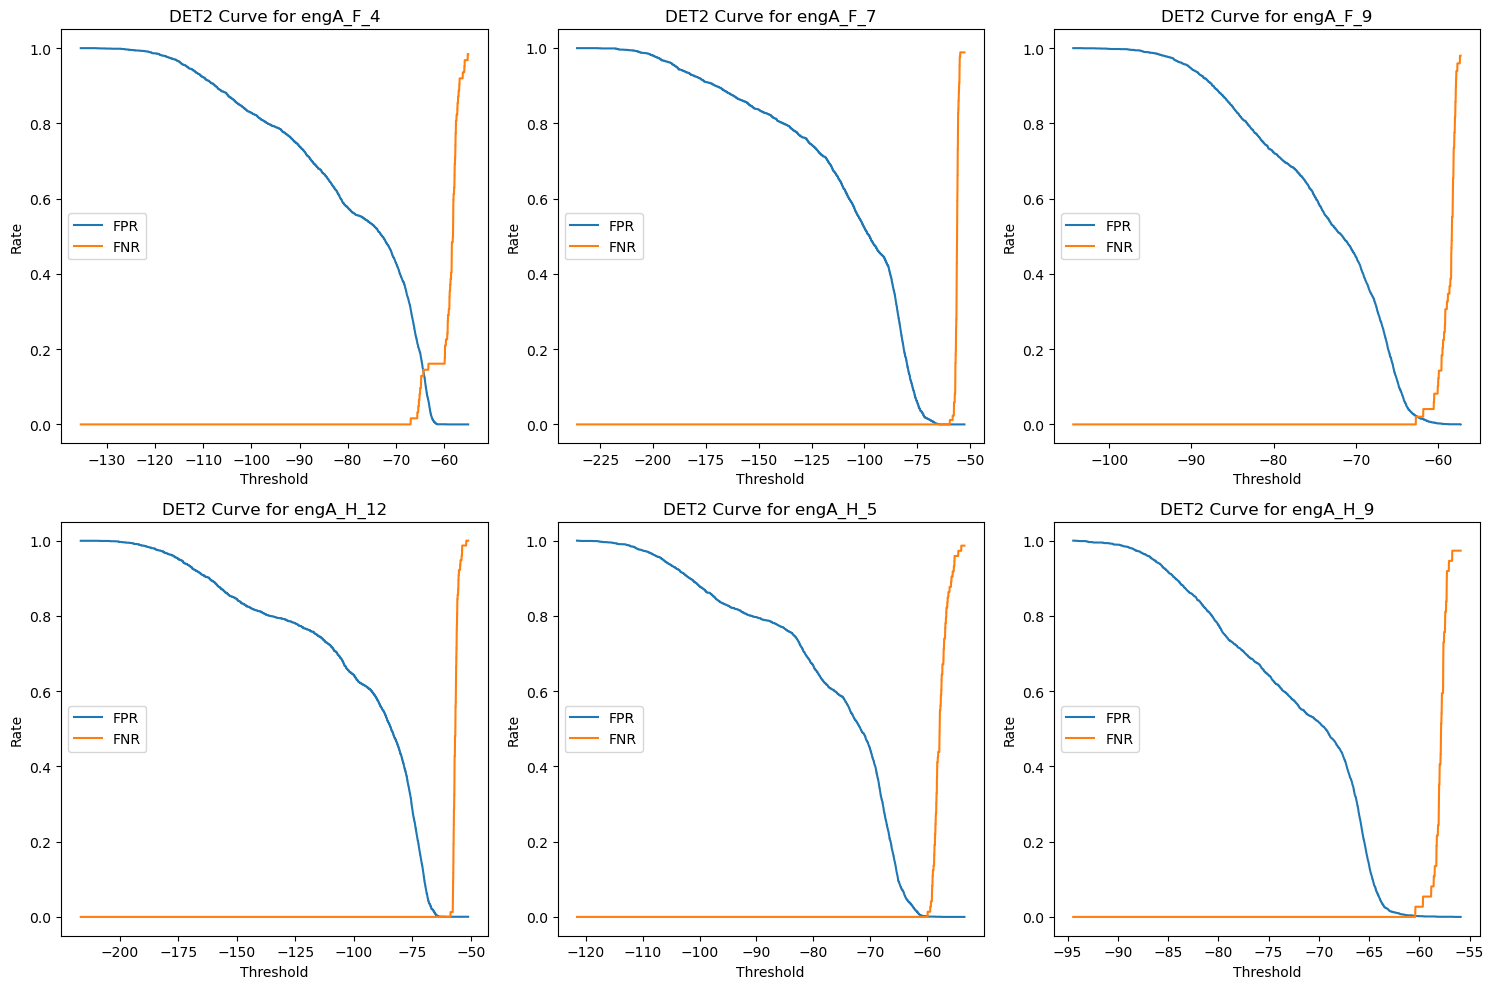

In [42]:
path_for_models = 'C:\\Users\\Pro\\Desktop\\Clients\\models'
folder_path = rf'C:\Users\Pro\Desktop\Clients\Test'
sub_plot(english_client_names,path_for_models,folder_path, n_comp=128,step_size=0.01, det=2)

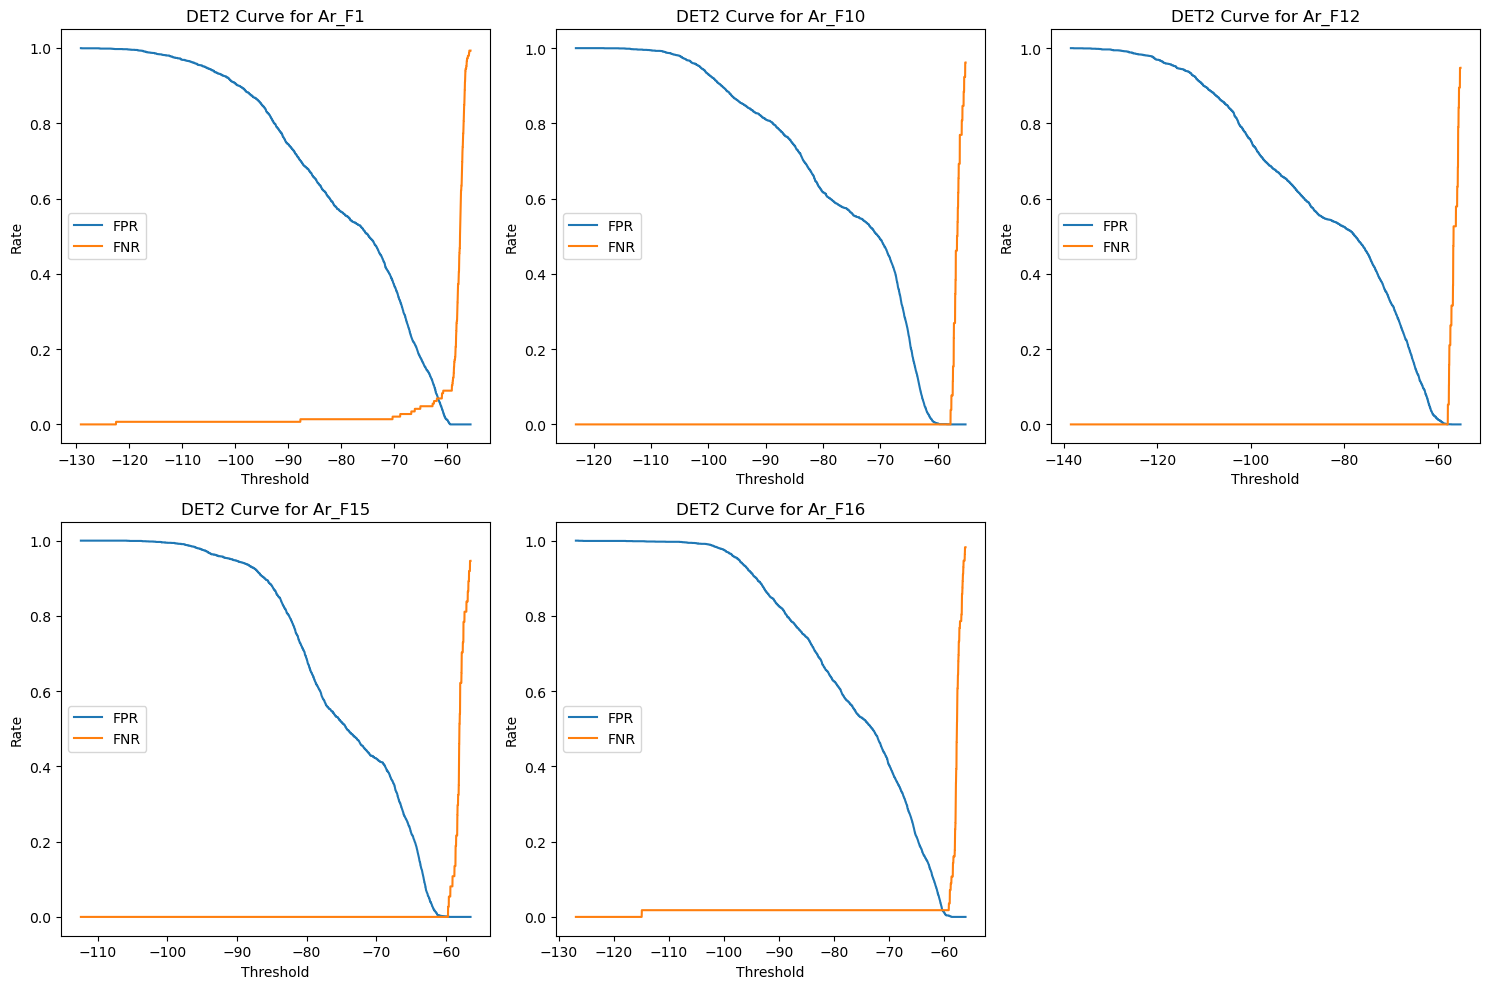

In [43]:
path_for_models = 'C:\\Users\\Pro\\Desktop\\Clients\\models'
folder_path = rf'C:\Users\Pro\Desktop\Clients\Test'
sub_plot(ar_client_names,path_for_models,folder_path, n_comp=128,step_size=0.01, det=2)

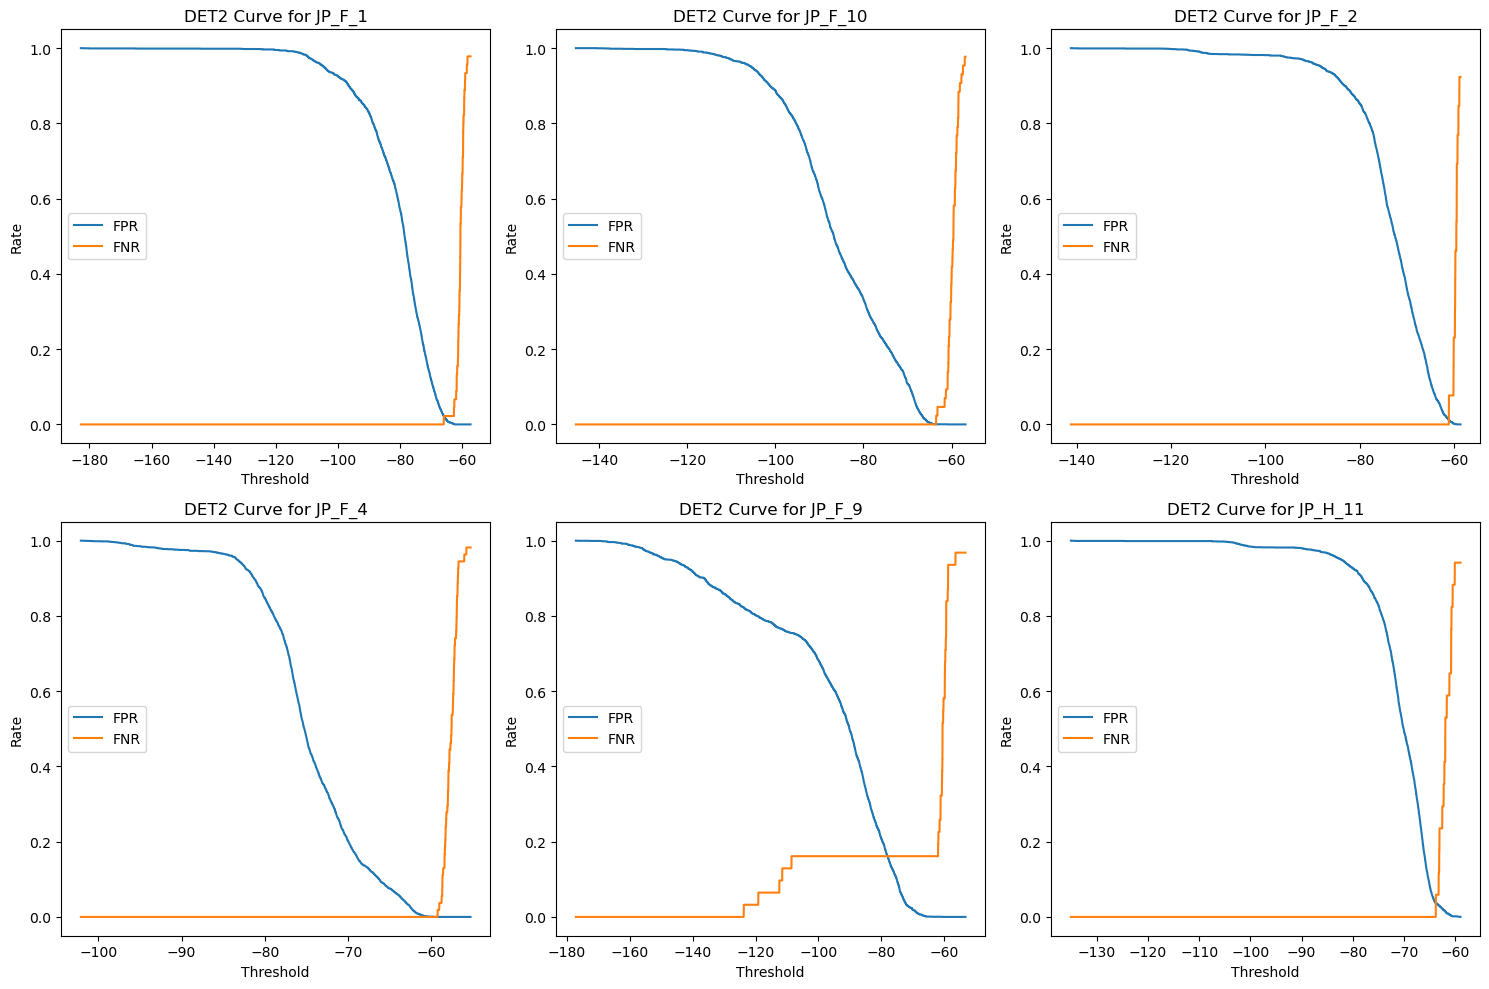

In [44]:
path_for_models = 'C:\\Users\\Pro\\Desktop\\Clients\\models'
folder_path = rf'C:\Users\Pro\Desktop\Clients\Test'
sub_plot(jp_client_names,path_for_models,folder_path, n_comp=128,step_size=0.01, det=2)

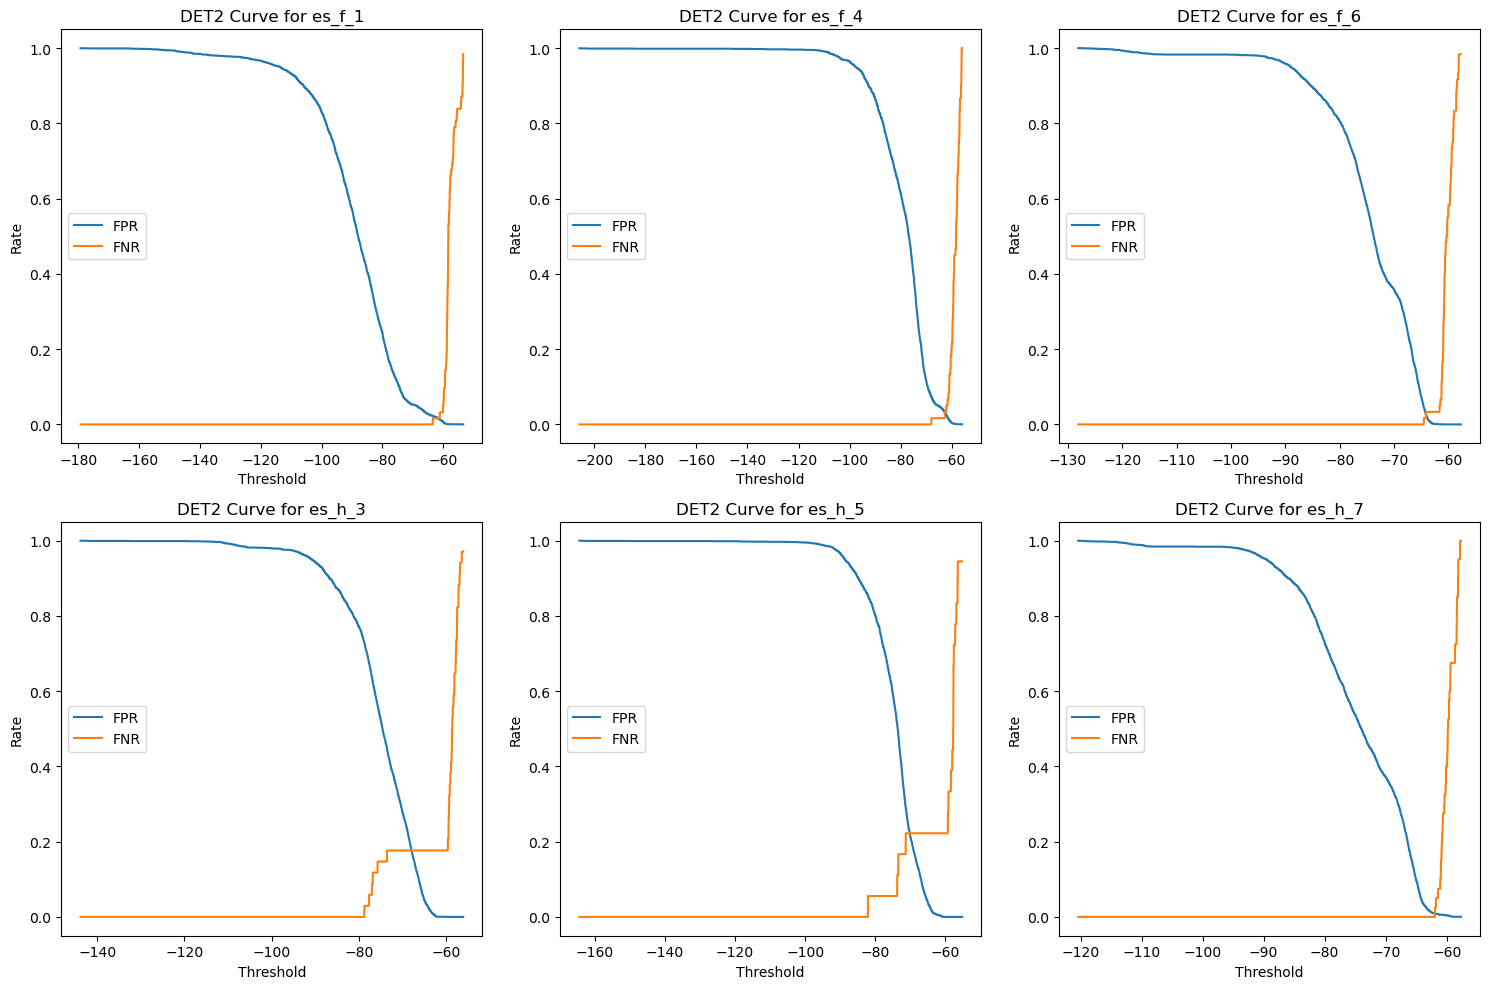

In [45]:
path_for_models = 'C:\\Users\\Pro\\Desktop\\Clients\\models'
folder_path = rf'C:\Users\Pro\Desktop\Clients\Test'
sub_plot(spanish_client_names,path_for_models,folder_path, n_comp=128,step_size=0.01, det=2)